# 8. Gradiente Descendente

### A ideia por trás do Gradiente Descendente

* Suponha que tenhamos a função f que tem como entrada um vetor de números reais e exibe, como saída, um único número real. 
* Tal função simples é:

In [2]:
def sum_of_squares(v):
    return sum(v_i**2 for v_i in v)

* Com frequência será necessário maximizar ou minimizar tais funções.
* Para funções como essa, o gradiente mostra a direção da entrada em que a função cresce mais rapidamente.
* Uma abordagem para maximizar uma função é:
  * Pegar um ponto de início aleatório;
  * Computar o gradiente;
  * Andar um pequeno passo na direção do gradiente e;
  * Repetir com o novo ponto inicial.
  
  
* Para minimizar, são realizados os mesmos passos na direção oposta.

![Maximizando grad. descendente](Imgs/Minimization_image.png)

### Estimando o gradiente

* Se f é uma função de uma variável, sua derivada em um ponto x indica como f(x) muda quando fazemos uma mudança bem pequena em x.
* Definida como limite de quocientes diferenciais:

In [3]:
def difference_quotient(f,x,h):
    return (f(x+h)-f(x))/h

![aproximando derivada](Imgs/apx_deriv.png)

* A derivada é a inclinação da linha tangente em (x, f(x)).
* O quociente diferencial é a inclinação da linha-não-tão-tangente que passa por (x+h, f(x+h)).
* Conforme h diminui, a linha-não-tão-tangente vai ficando mais próxima da linha tangente.
* Para muitas funções é fácil calcular as derivadas com exatidão. 
* Exemplo:

In [4]:
def square(x):
    return x*x

# E a derivada
def derivative(x):
    return 2*x

* Podemos estimar derivadas ao avaliar o quociente diferencial por um pequeno $e$. Veja o gráfico abaixo.

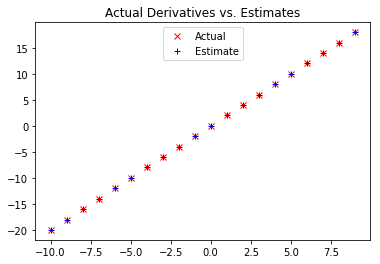

In [8]:
derivative_estimate = lambda x: difference_quotient(square, x, h=0.00001)

import matplotlib.pyplot as plt
x = range(-10,10)
plt.title("Actual Derivatives vs. Estimates")
plt.plot(x, list(map(derivative, x)), 'rx', label='Actual')
plt.plot(x, list(map(derivative_estimate, x)), 'b+', label='Estimate') # azul +
plt.legend(loc=9)
plt.show()

* Quando f é uma função de muitas variáveis, possui múltiplas derivadas parciais.
* Cada derivada indica como f muda com pequenas mudanças em uma das variáveis.
* Calcula-se a derivada parcial do i-ésimo ao tratar como uma função de apenas a i-ésima variável e depois podemos estimar o gradiente:

In [9]:
def partial_difference_quotient(f, v, i, h):
    # Computa o i-ésimo quociente diferencial parcial de f em v
    w = [v_j + (h if j == i else 0)
        for j, v_j in enumerate(v)]
    
    return (f(w)-f(v))/h

def estimate_gradient(f, v, h=0.00001):
    return [partial_difference_quotient(f,v,i,h)
           for i,_ in enumerate(v)]

### Usando o Gradiente

* Usaremos os gradientes para encontrar o mínimo entre todos os vetores tridimensionais.
* Pegaremos um ponto inicial aleatório e daremos pequenos passos na direção oposta do gradiente. 
* Será repetido até que cheguemos em um ponto em que o gradiente seja muito pequeno:

In [1]:
# Funções auxiliares cap. 04 (Álgebra Linear)
from Codigos.linear_algebra import vector_add, vector_subtract, vector_sum, vector_mean, dot, sum_of_squares, magnitude, distance

In [12]:
import random
def step(v, direction, step_size):
    # Move step_size na direção a partir de v
    return [v_i + step_size * direction_i
           for v_i, direction_i in zip(v, direction)]

def sum_of_squares_gradient(v):
    return [2 * v_i for v_i in v]

v = [random.randint(-10,10) for i in range(3)] # Coords Ponto inicial aleatório

tolerance = 0.0000001

while True:
    gradient = sum_of_squares_gradient(v) # Computa o gradiente no ponto v
    next_v = step(v, gradient, -0.01) # calcula um novo ponto
    if distance(next_v, v) < tolerance: # para se estiver convergindo
        break
    v = next_v # Continua se não estiver
    
print("Coordenadas do ponto mínimo: ", v)

Coordenadas do ponto mínimo:  [-3.7009791374886747e-06, -2.3131119609304243e-06, 2.3131119609304243e-06]


### Escolhendo o tamanho do próximo passo

* Existem 3 opções populares para escolher o tamanho do próximo passo do gradiente, são elas:
  1. Usar um passo de tamanho fixo
  2. Diminuir gradualmente o tamanho do passo a cada vez
  3. A cada passo, escolher o tamanho do passo que minimize o valor da função objetiva.
  
  
* A última opção, apesar de parecer perfeita, é uma computação custosa.
* Pode-se aproximá-la ao tentar uma variedade de passos que resulte no menor valor da função objetiva: 

In [13]:
step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]

* É possível que alguns tamanhos resultem em entradas inválidas.
* Para tal, é necessário criar uma função "segura" que retorna infinito para entradas inválidas:

In [14]:
def safe(f):
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            return float('inf')
    return safe_f

### Juntando tudo

* No geral, temos alguma target_fn que queremos minimizar e também temos o seu gradient_fn.
* Digamos que escolhemos um valor inicial para os parâmetros theta_0.
* Podemos implementar o gradiente descendente como:

In [15]:
def minimize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
    theta = theta_0
    target_fn = safe(target_fn)
    value = target_fn(theta)
    
    while True:
        gradient = gradient_fn(theta)
        next_thetas = [step(theta, gradient,-step_size) 
                       for step_size in step_sizes]
        next_theta = min(next_thetas, key=target_fn)
        next_value = target_fn(next_theta)
        
        if abs(value-next_value) < tolerance:
            return theta
        else:
            theta, value = next_theta, next_value

* Chamamos de minimize_batch porque, para cada passo do gradiente, ele considera o conjunto inteiro de dados.
* Podemos maximizar uma função minimizando o seu negativo:

In [16]:
def negate(f):
    return lambda *args, **kwargs: -f(*args, **kwargs)

def negate_all(f):
    return lambda *args, **kwargs: [-y for y in f(*args, **kwargs)]

def maximize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    return minimize_batch(negate(target_fn),
                         negate_all(gradient_fn),
                         theta_0,
                         tolerance)

### Gradiente Descendente Estocástico

* Nas abordagens anteriores, cada passo gradiente requer façamos uma previsão e computemos o gradiente para o conjunto de dados inteiro.
* Essa fuunções de erro normalmente são aditivas, ou seja, o erro previsto é a soma dos erros previstos para cada ponto.
* O gradiente descendente estocástico computa o gradiente apenas um ponto de cada vez.
* Circula os dados repetidamente até alcançar um ponto de parada.
* Durante os ciclos, os dados são iterados de forma aleatória:

In [17]:
def in_random_order(data):
    indexes = [i for i, _ in enumerate(data)]
    random.shuffle(indexes)
    for i in indexes:
        yield data[i]

* Andaremos um passo gradiente para cada ponto de dados.
* O método permite que circulemos o ponto mínimo até que paremos de obter melhorias. 
* A partir de então, diminuiremos o passo até o ponto de parada:

In [18]:
def minimize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):
    data = zip(x, y)
    theta = theta_0 # palpite inicial
    alpha = alpha_0 # tamanho do passo inicial
    min_theta, min_value = None, float("inf") # o mínimo até agora
    iterations_with_no_improvement = 0
    
    # se formos até 100 iterações sem melhorias, paramos
    while iterations_with_no_improvement < 100:
        value = sum( target_fn(x_i, y_i, theta) for x_i, y_i in data )
    
    if value < min_value:
        # se achou um novo mínimo, lembre-se
        # e volte para o tamanho do passo original
        min_theta, min_value = theta, value
        iterations_with_no_improvement = 0
        alpha = alpha_0
    else:
        # do contrário, não estamos melhorando, portanto tente
        # diminuir o tamanho do passo
        iterations_with_no_improvement += 1
        alpha *= 0.9
        
        # e ande um passo gradiente para todos os pontos de dados
        for x_i, y_i in in_random_order(data):
            gradient_i = gradient_fn(x_i, y_i, theta)
            theta = vector_subtract(theta, scalar_multiply(alpha, gradient_i))
            
    return min_theta

* A versão estocástica será tipicamente mais rápida que a versão batch.
* Uma função que maximiza:

In [19]:
def maximize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):
    return minimize_stochastic(negate(target_fn), 
                               negate_all(gradient_fn), 
                               x, y, theta_0, alpha_0=0.01)